# S05 - Exercices en classe/après-classe : Prétraitement et exploration des données (solution)

## Instructions
Pour chaque exercice, vous avez une cellule de code pour la réponse en dessous, où vous devez écrire votre réponse entre les lignes contenant `### commencez votre code ici ###` et `### terminez votre code ici ###`. Votre code peut contenir une ou plusieurs lignes et vous pouvez exécuter cette cellule afin de terminer l'exercice. Pour exécuter la cellule, vous pouvez taper `Shift+Enter` ou appuyer sur le bouton de lecture dans la barre d'outils ci-dessus. Vos résultats apparaîtront juste en dessous de cette cellule de réponse.

In [1]:
import math

import numpy as np
import pandas as pd

## Importation de données
Dans cet exercice, nous allons explorer un ensemble adapté de données qui fournit des informations sur le nombre de patients en attente et la durée d'attente à la fin de chaque trimestre, pour les admissions en hospitalisation et en hôpital de jour chez *Health and Social Care (HSC) Trusts* en Irlande du Nord. Les données sont présentées par centre de soins, spécialité, programme de soins et tranche horaire. Les données originales sont accessibles à [cette page](https://data.world/datagov-uk/a593a0b3-29ef-48f2-b2b2-ceb83d841a3c).

Ceci est une description des colonnes de nos données adaptées dans le fichier CSV `day-case-waiting-times.csv`.

| NOM DE LA VARIABLE | DESCRIPTION |  
|:----|:----|  
|quarter_ending| date de rapport pour chaque trimestre |  
|HSC_trust| Health and Social Care (HSC) Trusts |  
|specialty| spécialité du HSC (par exemple, urologie, chirurgie générale, chirurgie plastique) |  
|program| programme de soins (par exemple, santé mentale, services aigus) |  
|0-6_weeks| nombre de patients qui attendent entre (0, 6] semaines durant le trimestre correspondant |  
|>6-13_weeks| nombre de patients qui attendent entre (6, 13] semaines durant le trimestre correspondant |  
|>13-21_weeks| nombre de patients qui attendent entre (13, 21] semaines durant le trimestre correspondant |  
|>21-26_weeks| nombre de patients qui attendent entre (21, 26] semaines durant le trimestre correspondant |  
|>26-52_weeks| nombre de patients qui attendent entre (26, 52] semaines durant le trimestre correspondant |  
|>52_weeks| nombre de patients qui attendent plus de 52 semaines durant le trimestre correspondant |  
|>26-30_weeks| nombre de patients qui attendent entre (26, 30] semaines durant le trimestre correspondant |

Importez le fichier de données  `day-case-waiting-times.csv` dans un `DataFrame` nommé `df_WT`. Affichez les 5 premières lignes de votre `DataFrame`.

**Astuce** : vous pouvez utiliser la fonction `pd.read_csv()`.

In [2]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/data/day-case-waiting-times.csv'

### commencez votre code ici ###
df_WT = pd.read_csv(url)  # lecture d'un fichier de données dans un DataFrame
### terminez votre code ici ###

df_WT.head()

,quarter_ending,HSC_trust,specialty,program,0-6_weeks,>6-13_weeks,>13-21_weeks,>21-26_weeks,>26-52_weeks,>52_weeks,>26-30_weeks
0,30-Jun-07,Belfast,General Surgery,Acute Services,309,218,138,6,0,NaN,--
1,30-Jun-07,Belfast,Urology,Acute Services,483,301,116,3,0,NaN,--
2,30-Jun-07,Belfast,T & O Surgery,Acute Services,158,211,110,36,0,NaN,--
3,30-Jun-07,Belfast,ENT,Acute Services,121,159,72,1,0,NaN,--
4,30-Jun-07,Belfast,Ophthalmology,Acute Services,905,846,405,19,0,NaN,--


## Prétraitement des données et valeurs manquantes
### Exercice 1 : Modification des types de données des colonnes
Jetez un œil au type de données dans votre `DataFrame`. La colonne `quarter_ending` doit être de type `datetime64`, et toutes les colonnes de `0-6_weeks` à `>26-30_weeks` doivent être numériques (float ou int), car elles représentent le nombre de patients dont les temps d'attente se situaient dans les intervalles correspondants. Dans ce cas, le nombre flottant est requis si la colonne contient la valeur `NaN`.

Vos colonnes sont-elles du bon type ? Si ce n'est pas le cas, convertissez les données au bon format.

**Astuce 1 :** Vous pouvez utiliser les fonctions `pd.to_numeric()`, `pd.to_datetime()` et/ou la méthode `.astype()`.

**Astuce 2 :** Nous pouvons nous assurer que (i) une valeur non numérique sera définie comme `NaN` en utilisant l'argument `errors='coerce'`, et (ii) le type numérique est float en utilisant le paramètre `downcast='float'` dans `pd.to_numeric(column_series, errors='coerce', downcast='float')`.

Plus de détails peuvent être trouvés sur [cette page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html).

In [3]:
df_WT.dtypes

quarter_ending    object
HSC_trust         object
specialty         object
program           object
0-6_weeks         object
>6-13_weeks       object
>13-21_weeks      object
>21-26_weeks       int64
>26-52_weeks      object
>52_weeks         object
>26-30_weeks      object
dtype: object

In [4]:
### commencez votre code ici ###
df_WT['quarter_ending'] = pd.to_datetime(df_WT['quarter_ending'],
                                         format="%d-%b-%y")

for col in df_WT.columns[4:]:
    df_WT[col] = pd.to_numeric(df_WT[col], errors='coerce', downcast='float')
### terminez votre code ici ###

df_WT.dtypes

quarter_ending    datetime64[ns]
HSC_trust                 object
specialty                 object
program                   object
0-6_weeks                float32
>6-13_weeks              float32
>13-21_weeks             float32
>21-26_weeks             float32
>26-52_weeks             float32
>52_weeks                float32
>26-30_weeks             float32
dtype: object

### Exercice 2 : Valeurs manquantes
Jetez un œil aux valeurs manquantes dans votre `DataFrame`. Implémentez une ligne de code qui affiche le nombre total de valeurs manquantes dans chaque colonne.

In [5]:
### commencez votre code ici ###
# peut également utiliser la méthode isna() qui est la même que isnull()
df_WT.isnull().sum()  
### terminez votre code ici ###

quarter_ending       0
HSC_trust            0
specialty            0
program              0
0-6_weeks           18
>6-13_weeks         17
>13-21_weeks         5
>21-26_weeks         0
>26-52_weeks      2574
>52_weeks         3194
>26-30_weeks      3693
dtype: int64

Supposons que les valeurs manquantes peuvent apparaître lorsque les données ne sont pas disponibles. Ainsi, dans ce cas de valeurs manquantes, le nombre de patients avec des temps d'attente dans l'un des intervalles spécifiés par les colonnes de notre `DataFrame` est égal à 0. Nous pouvons remplacer les valeurs numériques manquantes par 0.

**Astuce :** vous pouvez utiliser la méthode `.fillna()` pour remplacer les valeurs manquantes des 7 dernières colonnes. Assurez-vous que les modifications sont appliquées/enregistrées dans votre `DataFrame`.

In [6]:
### commencez votre code ici ###
df_WT[df_WT.columns[-7:]] = df_WT[df_WT.columns[-7:]].fillna(0)
### terminez votre code ici ###

df_WT.isna().sum()

quarter_ending    0
HSC_trust         0
specialty         0
program           0
0-6_weeks         0
>6-13_weeks       0
>13-21_weeks      0
>21-26_weeks      0
>26-52_weeks      0
>52_weeks         0
>26-30_weeks      0
dtype: int64

### Exercice 3 : Agrégation des données 1
Exécutez la cellule de code ci-dessous. Comme vous pouvez le voir, le `DataFrame` comporte une colonne avec le nom `>26-52_weeks` et une autre colonne nommée `>26-30_weeks`. Comme certaines données ont été enregistrées dans l'une ou l'autre de ces colonnes,

1. nous n'utiliserons que la valeur maximale de ces deux colonnes,
2. placez la valeur résultante dans la colonne `>26-52_weeks`, et
3. supprimez la colonne `>26-30_weeks`.

**Astuce :** vous pouvez utiliser la méthode `DataFrame.drop(columns='...')` pour supprimer la colonne sélectionnée. Voir [ce lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [7]:
### commencez votre code ici ###
df_WT['>26-52_weeks'] = df_WT[['>26-30_weeks', '>26-52_weeks']].max(axis=1)
# alternative moins efficace que ci-dessus :
# df_WT['>26-52_semaines'] = [
#     max(df_WT.at[i, '>26-52_semaines'], df_WT.at[i, '>26-30_semaines']) 
#     for i in df_WT.index]

df_WT = df_WT.drop(columns='>26-30_weeks')   
### terminez votre code ici ###

df_WT.head()

,quarter_ending,HSC_trust,specialty,program,0-6_weeks,>6-13_weeks,>13-21_weeks,>21-26_weeks,>26-52_weeks,>52_weeks
0,2007-06-30,Belfast,General Surgery,Acute Services,309.0,218.0,138.0,6.0,0.0,0.0
1,2007-06-30,Belfast,Urology,Acute Services,483.0,301.0,116.0,3.0,0.0,0.0
2,2007-06-30,Belfast,T & O Surgery,Acute Services,158.0,211.0,110.0,36.0,0.0,0.0
3,2007-06-30,Belfast,ENT,Acute Services,121.0,159.0,72.0,1.0,0.0,0.0
4,2007-06-30,Belfast,Ophthalmology,Acute Services,905.0,846.0,405.0,19.0,0.0,0.0


### Exercice 4 : Agrégation de données 2
Calculez le **nombre total de patients** et ajoutez cette nouvelle information en tant que nouvelle colonne dans le `DataFrame` et attribuez-lui le nom `'total_patients'`. Vous pouvez utiliser la méthode `DataFrame.sum(axis=1)` pour effectuer la somme en fonction des colonnes. Assurez-vous de n'additionner que les six dernières colonnes contenant le nombre de patients dans cette nouvelle colonne et de **tracer un histogramme** de cette colonne.

<Axes: ylabel='Frequency'>

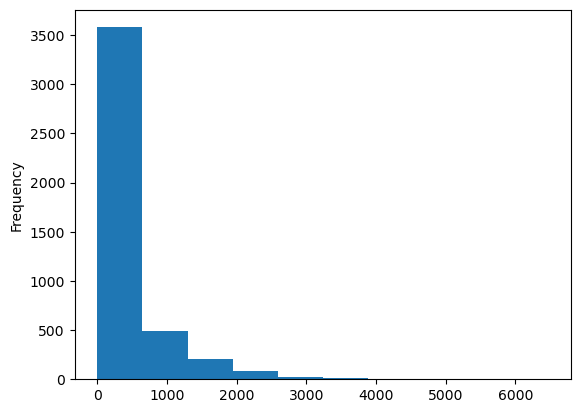

In [8]:
### commencez votre code ici ###
df_WT['total_patients'] = df_WT[df_WT.columns[-6:]].sum(axis=1)
df_WT['total_patients'].plot(kind='hist')
### terminez votre code ici ###

## Transformation des données

### Exercice 5 : Asymétrie
Veuillez calculer l'asymétrie de cette nouvelle colonne `total_patients` où :
$\mathit{Skewness} = \frac{3(X_{mean}-X_{median})}{\sigma_X}$

**Astuce :** vous pouvez utiliser les méthodes `DataFrame.mean()`, `DataFrame.median()` et `DataFrame.std()` pour vos calculs.

In [9]:
### commencez votre code ici ###
skew = 3 * (df_WT['total_patients'].mean() - df_WT['total_patients'].median()) / df_WT['total_patients'].std()
### terminez votre code ici ###

print("skewness:", skew)

skewness: 1.1503191292793218


### Exercice 6 : transformation logarithmique
Veuillez (i) transformer cette colonne `total_patients` à l'aide d'une transformation logarithmique `log(x + 1)` et l'affecter à une nouvelle colonne `log_total_patients`, et (ii) tracer un histogramme de cette nouvelle colonne.

<Axes: ylabel='Frequency'>

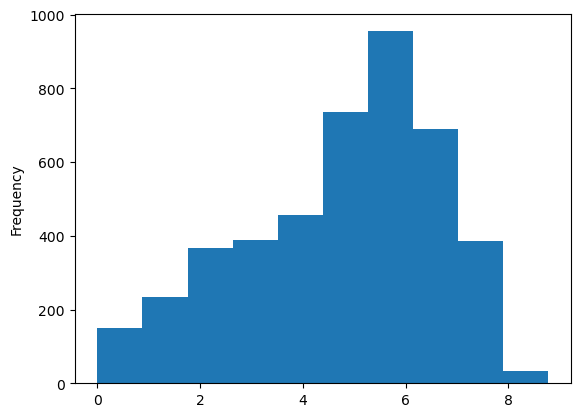

In [10]:
### commencez votre code ici ###
df_WT['log_total_patients'] = np.log(df_WT['total_patients'] + 1)
# une alternative moins efficace est la suivante
#df_WT['log_total_patients'] = [math.log(x + 1) for x in df_WT['total_patients']]

df_WT['log_total_patients'].plot(kind='hist')
### terminez votre code ici ###

### Exercice 7 : Variables dummy
Une variable qualitative doit généralement être codée avec des **variables binaires** (également appelées variables indicatrices), chacune ne prenant qu'une seule de deux valeurs (0 ou 1 ; `False` ou `True`) avant d'être utilisée dans l'analyse prédictive.

Veuillez créer $k-1$ variables binaires.

Cela implique que vous obtenez $k-1 = 3$ variables binaires correspondant aux valeurs de la variable `program`. Vous pouvez vérifier les valeurs de la variable qualitiative d'origine en exécutant la cellule ci-dessous.

In [11]:
df_WT['program'].unique()

array(['Acute Services', 'Mental Health', 'Elderly Care',
       'Maternity & Child Health'], dtype=object)

Créez d’abord un nouvel ensemble de colonnes en utilisant `pd.get_dummies(...)` et attribuez le nouvel ensemble de colonnes au nouvel objet `df_dummies`.

**Astuce :** vous pouvez utiliser la fonction `pd.get_dummies()`, qui convertit automatiquement les variables catégorielles en variables binaires. Pour effectuer un codage avec $k-1$ variables, nous pouvons indiquer le paramètre `drop_first=True`. Vous pouvez consulter [cette page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) pour plus d'informations.

In [12]:
### commencez votre code ici ###
df_dummies = pd.get_dummies(df_WT['program'], drop_first=True, prefix='program')
### terminez votre code ici ###

df_dummies.describe()

,program_Elderly Care,program_Maternity & Child Health,program_Mental Health
count,4399,4399,4399
unique,2,2,2
top,False,False,False
freq,4351,4398,4395


Pour ajouter l'ensemble de nouvelles colonnes, nous pouvons utiliser la fonction df1 = df1.join(df2). Voir ce [lien](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) pour plus de détails.

In [13]:
### commencez votre code ici ###
# joindre df_WT avec df_dummies
# vous verrez une erreur si vous exécutez cette cellule deux fois car les colonnes auraient déjà été jointes la première fois
df_WT = df_WT.join(df_dummies)
### terminez votre code ici ###

df_WT

,quarter_ending,HSC_trust,specialty,program,0-6_weeks,>6-13_weeks,>13-21_weeks,>21-26_weeks,>26-52_weeks,>52_weeks,total_patients,log_total_patients,program_Elderly Care,program_Maternity & Child Health,program_Mental Health
0,2007-06-30,Belfast,General Surgery,Acute Services,309.0,218.0,138.0,6.0,0.0,0.0,671.0,6.510258,False,False,False
1,2007-06-30,Belfast,Urology,Acute Services,483.0,301.0,116.0,3.0,0.0,0.0,903.0,6.806829,False,False,False
2,2007-06-30,Belfast,T & O Surgery,Acute Services,158.0,211.0,110.0,36.0,0.0,0.0,515.0,6.246107,False,False,False
3,2007-06-30,Belfast,ENT,Acute Services,121.0,159.0,72.0,1.0,0.0,0.0,353.0,5.869297,False,False,False
4,2007-06-30,Belfast,Ophthalmology,Acute Services,905.0,846.0,405.0,19.0,0.0,0.0,2175.0,7.685244,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,2019-09-30,Western,Ophthalmology,Acute Services,418.0,392.0,438.0,246.0,1437.0,212.0,3143.0,8.053251,False,False,False
4395,2019-09-30,Western,Oral Surgery,Acute Services,116.0,60.0,58.0,19.0,151.0,94.0,498.0,6.212606,False,False,False
4396,2019-09-30,Western,Pain Management,Acute Services,59.0,38.0,38.0,21.0,213.0,92.0,461.0,6.135565,False,False,False
4397,2019-09-30,Western,T & O Surgery,Acute Services,164.0,92.0,90.0,67.0,986.0,693.0,2092.0,7.646354,False,False,False
